In [2]:
import pandas as pd
import json
from datetime import datetime
from datetime import date

In [3]:
%matplotlib inline

In [7]:
df = pd.read_csv('data/github-latam.csv', index_col='month')

### Qué datos son?
Son el número de usuarios creador por mes. Es un indicador de entusiasmo por la programación, ya que no necesariamente estos usuarios crean proyectos o colaboran con otros, etc.

### Cómo se obtuvieron los datos?

Usando la API de Github, especificamente el endpoint de search users, usando los parametros location y created:
```
https://api.github.com/search/users?q=location:Chile created:"2016-01-01 .. 2016-02-01"
```

### Qué tan confiables son los datos?
La Github API no es muy precisa en cuanto al campo de ubicación (location), por ejemplo se encuentra "Brazil" y "Brasil", "México" y "Mexico". Sin embargo, no deja de ser interesante. No necesariamente los usuarios crean repositorios exclusivamente de código.

### Normalizar los nombres 

In [8]:
df['peru'] = df['perú'] + df['peru']
del df['perú']

In [9]:
df['mexico'] = df['méxico'] + df['mexico']
del df['méxico']

In [10]:
df['panama'] = df['panamá'] + df['panama']
del df['panamá']

In [11]:
df['brasil'] = df['brazil'] + df['brasil']
del df['brazil']

In [12]:
df.columns

Index(['honduras', 'argentina', 'bolivia', 'brasil', 'chile', 'colombia',
       'costa rica', 'cuba', 'ecuador', 'el salvador', 'guadeloupe',
       'guatemala', 'haiti', 'martinique', 'mexico', 'nicaragua', 'panama',
       'paraguay', 'peru', 'puerto rico', 'uruguay', 'venezuela'],
      dtype='object')

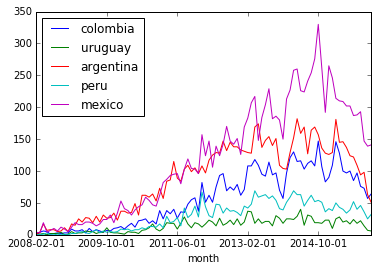

In [13]:
df[['colombia', 'uruguay', 'argentina', 'peru', 'mexico']].plot()

### Países con más usuarios registrados

In [14]:
df.sum().sort_values(ascending=False)

brasil         37601
mexico         11401
argentina       8545
colombia        5365
chile           4509
venezuela       3035
peru            2775
uruguay         1377
ecuador         1231
guatemala        911
bolivia          717
panama           621
paraguay         470
cuba             362
honduras         359
nicaragua        347
haiti             68
guadeloupe        54
martinique        29
puerto rico       16
costa rica        15
el salvador        6
dtype: int64

In [15]:
# Analizar solo los paises que en total tengan más de 1000 usuarios
top_countries = df.loc[:, (df.sum() > 1000)]

### Brasil al parecer es de otra liga

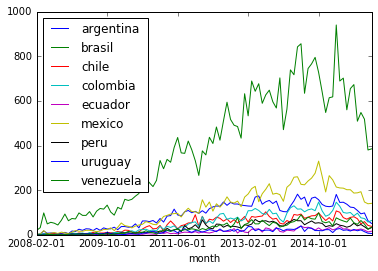

In [16]:
top_countries.plot()

###  Brasil v. Latinoamérica

In [17]:
# Hacer una series con todos menos Brasil
other_countries = top_countries.copy()
del other_countries['brasil']
other_countries = other_countries.sum(axis=1)

La suma de los demás paises incluidos Mexico y Argentina casi van a la par con Brasil

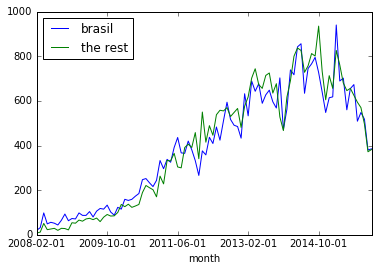

In [18]:
df2 = pd.DataFrame()
df2['brasil'] = top_countries.brasil
df2['the rest'] = other_countries
df2.plot()

### Normalizar usando la Población

In [20]:
countries_info = pd.read_csv('data/latam-countries2.csv')
# Usar la poblacón en millones
countries_info['Population'] = countries_info.Population.apply(lambda x: x / 1000000)
countries_info['Country'] = countries_info.Country.str.lower()

# Brasil con s
countries_info.ix[0, 'Country']  = 'brasil'
populations = dict(countries_info.values)
populations 

{'argentina': 43.132,
 'bolivia': 10.52,
 'brasil': 204.519,
 'chile': 18.006,
 'colombia': 48.218,
 'costa rica': 4.851,
 'cuba': 11.252,
 'dominican republic': 9.98,
 'ecuador': 16.279,
 'el salvador': 6.46,
 'french guiana': 0.262,
 'guadeloupe': 0.405,
 'guatemala': 16.176,
 'haiti': 10.994,
 'honduras': 8.95,
 'martinique': 0.383,
 'mexico': 121.006,
 'nicaragua': 6.514,
 'panama': 3.764,
 'paraguay': 7.003,
 'peru': 31.153,
 'puerto rico': 3.508,
 'saint barthélemy': 0.01,
 'saint martin': 0.036,
 'uruguay': 3.31,
 'venezuela': 30.62}

### Argentina remonta el marcador gracias al indicador de Desarrolladores por Millón de Habitantes-- DMH &trade;

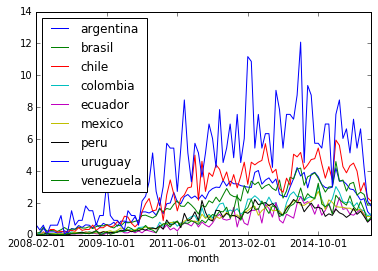

In [21]:
# Dividimos por millones de habitantes para obtener algo?
_ = top_countries.apply(lambda x: x / populations[x.name]).plot()